# 모델 성능 검증하기
<br>
광석과 일반 암석에 수중 음파 탐지기를 쏜 후 결과를 모아 데이터셋을 준비하고, 음파 탐지기의 수신 결과만 보고 광석인지 일반 암석인지를 구분하는 모델을 만듬

In [2]:
import pandas as pd

df = pd.read_csv('../../../../data/python_data/sonar3.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [3]:
# 일반 암석(0)과 광석(1)이 몇 개 있는지 확인합니다.
df[60].value_counts()

1    111
0     97
Name: 60, dtype: int64

In [4]:
# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = df.iloc[:,0:60]
y = df.iloc[:,60]

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델을 설정합니다.
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history=model.fit(X, y, epochs=200, batch_size=10)

Epoch 1/200
21/21 [==============================] - 1s 2ms/step - loss: 0.6859 - accuracy: 0.5481
Epoch 2/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.5865
Epoch 3/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.6250
Epoch 4/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.6490
Epoch 5/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6345 - accuracy: 0.6587
Epoch 6/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.6538
Epoch 7/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6157 - accuracy: 0.7067
Epoch 8/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.6635
Epoch 9/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5855 - accuracy: 0.7115
Epoch 10/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5726 - accuracy: 0.7163
Epoch 11/

21/21 [==============================] - 0s 2ms/step - loss: 0.1869 - accuracy: 0.9519
Epoch 84/200
21/21 [==============================] - 0s 2ms/step - loss: 0.1868 - accuracy: 0.9519
Epoch 85/200
21/21 [==============================] - 0s 2ms/step - loss: 0.1861 - accuracy: 0.9279
Epoch 86/200
21/21 [==============================] - 0s 2ms/step - loss: 0.1769 - accuracy: 0.9423
Epoch 87/200
21/21 [==============================] - 0s 2ms/step - loss: 0.1773 - accuracy: 0.9327
Epoch 88/200
21/21 [==============================] - 0s 2ms/step - loss: 0.1698 - accuracy: 0.9519
Epoch 89/200
21/21 [==============================] - 0s 2ms/step - loss: 0.1672 - accuracy: 0.9423
Epoch 90/200
21/21 [==============================] - 0s 2ms/step - loss: 0.1615 - accuracy: 0.9519
Epoch 91/200
21/21 [==============================] - 0s 2ms/step - loss: 0.1652 - accuracy: 0.9567
Epoch 92/200
21/21 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9567
Epoch 93/200


21/21 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 1.0000
Epoch 165/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 1.0000
Epoch 166/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 1.0000
Epoch 167/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 1.0000
Epoch 168/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0439 - accuracy: 0.9952
Epoch 169/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 1.0000
Epoch 170/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 1.0000
Epoch 171/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0346 - accuracy: 1.0000
Epoch 172/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 1.0000
Epoch 173/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 1.0000
Epoc

### 실행 결과
- 200번 반복되었을 때 결과가 정확도 100%
- 어떤 광물이던 100% 판별해 내는 모델인가...? > 과적합이 발생했을 가능성 확인

---
---


## 과적합(Overfitting)
- 모델이 학습 데이터셋 안에서는 일정 수준 이상의 예측 정확도를 보이지만, 새로운 데이터에 적용하면 잘 맞지 않음
- 너무 주어진 샘플에만 최적화되어있음
- 지금 그어진 선을 새로운 데이터에 적용하면 정확한 분류가 어려워짐을 의미함
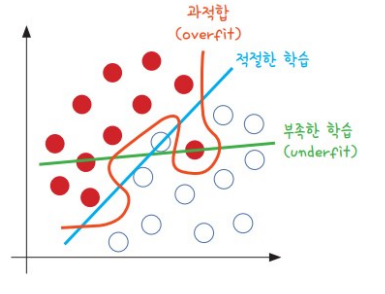
- 층이 너무 많거나, 변수가 복잡하거나, 테스트셋과 학습셋이 중복될 때 발생
- 딥러닝은 학습 단계에서 입력층, 은닉층, 출력층의 노드들에 상당히 많은 변수가 투입되므로 늘 주의가 필요함

## 과적합 방지
- **학습을 하는 데이터셋과 이를 테스트할 데이터셋을 완전히 구분**한 후 학습과 동시에 테스트를 병행하며 진행하는 것이 한 방법
#### 학습셋과 테스트셋
- 신경망을 만들어 70개의 샘플로 학습을 진행한 후 이 학습의 결괄르 저장
- 이렇게 저장된 파일을 모델이라 함
- 모델은 다른 셋에 적용할 경우 학습 단계에서 각인되었던 그대로 다시 수행
- 나머지 30개의 샘플로 실험해서 정확도를 살펴보면 학습이 얼마나 잘 되었는지 알 수 있음


- 지금까지의 학습 데이터를 이용해 정확도를 측정한 것은 데이터에 들어 있는 모든 샘플을 그래도 테스트에 활용한 결과
- 이를 통해 학습이 진행되는 상황을 파악할 수는 있지만, 새로운 데이터에 저굥ㅇ했을 때 어느 정도의 성능이 나올지는 알 수 없음
- 머신러닝의 최종 목적은 과거의 데이터를 토대로 새로운 데이터를 예측하는 것이기 때문에 테스트셋을 만들어 정확한 평가를 병행하는 것이 매우 중요함
- 학습셋만 가지고 평가할 때, 층을 더하거나 epoch 값을 높여 실행 횟수를 늘리면 정확도는 계속해서 올라갈 수 있으나 학습 데이터셋만으로 평가한 예측 성공률이 테스트셋에서도 그대로 나타나지 않음

즉, 학습이 깊어져 학습셋 내부에서 성공률은 높아져도 테스트셋에서는 효과가 없다면 과적합이 일어나고 있는 것
<br>
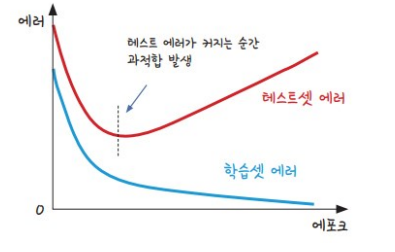
- 학습을 진행해도 테스트 결과가 더 좋아지지 않는 지점에서 멈추어야 함

해당 실험 결과에서 나온 결론은 **은닉층(Number of Hidden Units)개수가 올라감에 따라 학습셋의 예측률(Average Performance on Training Sets)과 테스트셋의 예측률(Average Performance of Testing Sets)의 변화**임

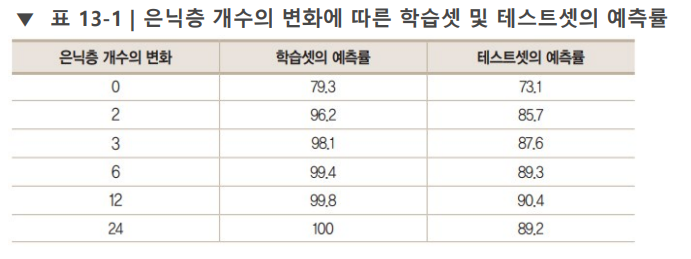

즉, 식이 복잡해지고 학습량이 늘어날수록 학습 데이터를 통한 예측률은 계속해서 올라가지만, 적절하게 조절하지 않을 경우 테스트셋을 이용한 예측률은 떨어지는 것을 확인

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = df.iloc[:,0:60]
y = df.iloc[:,60]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    shuffle=True)

In [9]:
# 모델을 설정합니다.
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다. -> 훈련셋으로 fit시키기
history=model.fit(X_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
15/15 [==============================] - 1s 2ms/step - loss: 0.7051 - accuracy: 0.4483
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.6414
Epoch 3/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6816 - accuracy: 0.6345
Epoch 4/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.6069
Epoch 5/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6665 - accuracy: 0.6483
Epoch 6/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6593 - accuracy: 0.7034
Epoch 7/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.7448
Epoch 8/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6360 - accuracy: 0.7448
Epoch 9/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6217 - accuracy: 0.7448
Epoch 10/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6031 - accuracy: 0.7172
Epoch 11/

15/15 [==============================] - 0s 2ms/step - loss: 0.1143 - accuracy: 0.9724
Epoch 84/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1149 - accuracy: 0.9793
Epoch 85/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1146 - accuracy: 0.9793
Epoch 86/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1194 - accuracy: 0.9655
Epoch 87/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1166 - accuracy: 0.9586
Epoch 88/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1141 - accuracy: 0.9793
Epoch 89/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1043 - accuracy: 0.9862
Epoch 90/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0996 - accuracy: 0.9793
Epoch 91/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1058 - accuracy: 0.9862
Epoch 92/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1012 - accuracy: 0.9862
Epoch 93/200


15/15 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 1.0000
Epoch 165/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0278 - accuracy: 1.0000
Epoch 166/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 1.0000
Epoch 167/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 1.0000
Epoch 168/200
15/15 [==============================] - 0s 4ms/step - loss: 0.0270 - accuracy: 1.0000
Epoch 169/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 1.0000
Epoch 170/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0262 - accuracy: 1.0000
Epoch 171/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 1.0000
Epoch 172/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 1.0000
Epoch 173/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 1.0000
Epoc

In [23]:
# 모델을 테스트셋에 적용해 정확도를 구합니다. 
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 5ms/step - loss: 0.4848 - accuracy: 0.8537
Test accuracy: 0.8536585569381714


In [24]:
from sklearn.metrics import confusion_matrix
import numpy as np
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
confusion_matrix(y_true=y_test, y_pred=y_pred)

2/2 [==============================] - 0s 4ms/step


array([[13,  4],
       [ 2, 22]], dtype=int64)

### 모델의 저장과 재사용

In [11]:
from keras.models import load_model, save_model
model.save('my_model.hdf5') 

C:\Users\Playdata\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
# 테스트를 위해 조금 전 사용한 모델을 메모리에서 삭제합니다.
del model

In [15]:
# 모델을 새로 불러옵니다.
model = load_model('my_model.hdf5') 

In [16]:
# 불러온 모델을 테스트셋에 적용해 정확도를 구합니다. 
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 5ms/step - loss: 1.2267 - accuracy: 0.8413
Test accuracy: 0.841269850730896


## K겹 교차검증
- 데이터셋을 여러 개로 나누어 하나씩 테스트셋으로 사용하고, 나머지를 모두 합해서 학습셋으로 사용하는 방법
- 가지고 있는 데이터를 100% 학습셋으로 사용할 수 있고, 또 동시에 테스트셋으로도 사용할 수 있음

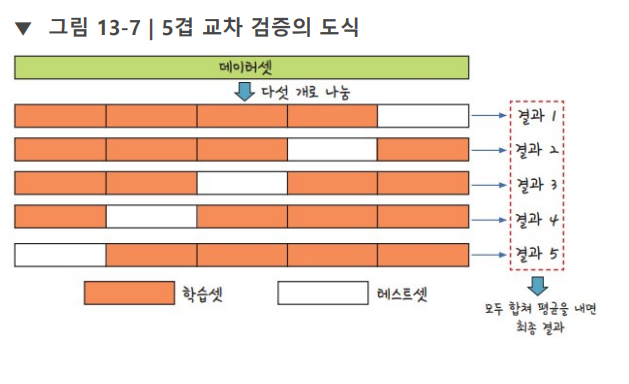
- k데이터셋을 다섯 개로 나눈 후 그중 네 개를 학습셋으로, 나머지 하나를 테스트셋으로 만들어 다섯 번의 학습을 순차적으로 실시하는 것


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = df.iloc[:,0:60]
y = df.iloc[:,60]

In [20]:
#몇 겹으로 나눌 것인지를 정합니다. 
# 총 5번의 정확도를 구함
k=5

#KFold 함수를 불러옵니다. 분할하기 전에 샘플이 치우치지 않도록 섞어 줍니다.
kfold = KFold(n_splits=k, shuffle=True)

#정확도가 채워질 빈 리스트를 준비합니다.
acc_score = []

def model_fn():
    model = Sequential() #딥러닝 모델의 구조를 시작합니다.
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

#K겹 교차 검증을 이용해 k번의 학습을 실행합니다. 
for train_index , test_index in kfold.split(X):  # for문에 의해서 k번 반복합니다. spilt()에 의해 k개의 학습셋, 테스트셋으로 분리됩니다.
    X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]  
    y_train , y_test = y.iloc[train_index], y.iloc[test_index]

    model = model_fn()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history=model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0) 
    # verbose = 0 : 학습과정의 출력 생략
    
    accuracy = model.evaluate(X_test, y_test)[1]  #정확도를 구합니다.
    acc_score.append(accuracy)  #정확도 리스트에 저장합니다.

#k번 실시된 정확도의 평균을 구합니다.
avg_acc_score = sum(acc_score)/k

#결과를 출력합니다.
print('정확도:', acc_score)
print('정확도 평균:', avg_acc_score)

2/2 [==============================] - 0s 5ms/step - loss: 0.4848 - accuracy: 0.8537
정확도: [0.8809523582458496, 0.8333333134651184, 0.8095238208770752, 0.8536585569381714, 0.8536585569381714]
정확도 평균: 0.8462253212928772
